In [33]:
#
# What do the stock exchanges look like as a whole?
#
# To get the data for this notebook, run:
#   python update_symbol_metadata.py
#
#

In [34]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 8)
from matplotlib import pyplot as plt

In [35]:
# read in exchange data
nasdaq = pd.read_csv('data/SYMBOLS_NASDAQ.csv').sort_values('MarketCap', ascending=False)
nyse = pd.read_csv('data/SYMBOLS_NYSE.csv').sort_values('MarketCap', ascending=False)

# total number of listings per exchange
print(len(nasdaq), len(nyse))

3024 2457


# Market Cap

## Overall

In [36]:
# top companies by market capitalization: nasdaq
nasdaq.head(10)

,Symbol,Name,MarketCap,IPOyear,Sector,Industry
185,AAPL,Apple Inc.,1.069436e+12,1980.0,Technology,Computer Manufacturing
131,AMZN,"Amazon.com, Inc.",9.166411e+11,1997.0,Consumer Services,Catalog/Specialty Distribution
117,GOOGL,Alphabet Inc.,8.458398e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
116,GOOG,Alphabet Inc.,8.354812e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
1843,MSFT,Microsoft Corporation,8.258917e+11,1986.0,Technology,Computer Software: Prepackaged Software
935,FB,"Facebook, Inc.",5.017986e+11,2012.0,Technology,"Computer Software: Programming, Data Processing"
1425,INTC,Intel Corporation,2.194860e+11,NaN,Technology,Semiconductors
572,CSCO,"Cisco Systems, Inc.",2.157212e+11,1990.0,Technology,Computer Communications Equipment
623,CMCSA,Comcast Corporation,1.631168e+11,NaN,Consumer Services,Television Services
2168,PEP,"Pepsico, Inc.",1.625904e+11,NaN,Consumer Non-Durables,Beverages (Production/Distribution)


In [37]:
# top companies by market capitalization: nyse
nyse.head(10)

,Symbol,Name,MarketCap,IPOyear,Sector,Industry
69,BABA,Alibaba Group Holding Limited,4.433249e+11,2014.0,Miscellaneous,Business Services
1223,JPM,J P Morgan Chase & Co,3.857305e+11,NaN,Finance,Major Banks
1252,JNJ,Johnson & Johnson,3.606687e+11,NaN,Health Care,Major Pharmaceuticals
881,XOM,Exxon Mobil Corporation,3.313528e+11,NaN,Energy,Integrated oil Companies
2319,V,Visa Inc.,3.248320e+11,NaN,Miscellaneous,Business Services
245,BAC,Bank of America Corporation,3.077910e+11,NaN,Finance,Major Banks
2352,WMT,Walmart Inc.,2.887401e+11,NaN,Consumer Services,Department/Specialty Retail Stores
2371,WFC,Wells Fargo & Company,2.854161e+11,NaN,Finance,Major Banks
2268,UNH,UnitedHealth Group Incorporated,2.520942e+11,NaN,Health Care,Medical Specialities
1750,PFE,"Pfizer, Inc.",2.462084e+11,NaN,Health Care,Major Pharmaceuticals


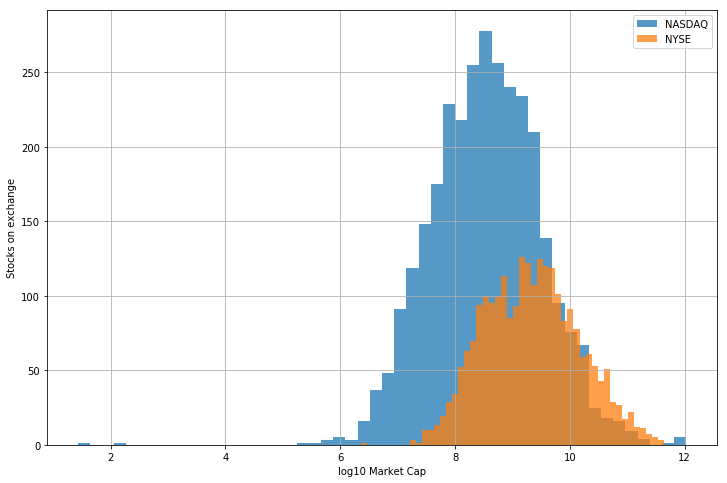

Total market cap (trillions USD):
 	NYSE:	29.05 
	NASDAQ:	13.93


In [40]:
# market cap distribution
plt.hist(np.log10(nasdaq.MarketCap), bins=50, label='NASDAQ', alpha=0.75)
plt.hist(np.log10(nyse.MarketCap), bins=50, label='NYSE', alpha=0.75)
plt.grid()
plt.legend()
plt.xlabel('log10 Market Cap')
plt.ylabel('Stocks on exchange')
plt.show()

#
# Summary:
#  (i) Market cap seems nearly log-normal distributed
#  (ii) Fewer stocks on NYSE compared to NASDAQ, but higher average market cap
#
print(
    'Total market cap (trillions USD):\n', 
    '\tNYSE:\t{:.2f}'.format(nyse.MarketCap.sum() / 1e12), 
    '\n\tNASDAQ:\t{:.2f}'.format(nasdaq.MarketCap.sum() / 1e12)
)

## By Sector

In [38]:
# top companies by market cap broken down by sector: nasdaq
# FIXME why is there a NaN sector?
nasdaq.groupby('Sector').head(3).sort_values(['Sector', 'MarketCap'], ascending=False)

,Symbol,Name,MarketCap,IPOyear,Sector,Industry
707,CSX,CSX Corporation,6.328575e+10,NaN,Transportation,Railroads
142,AAL,"American Airlines Group, Inc.",1.740264e+10,NaN,Transportation,Air Freight/Delivery Services
421,CHRW,"C.H. Robinson Worldwide, Inc.",1.352564e+10,1997.0,Transportation,Oil Refining/Marketing
185,AAPL,Apple Inc.,1.069436e+12,1980.0,Technology,Computer Manufacturing
117,GOOGL,Alphabet Inc.,8.458398e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
116,GOOG,Alphabet Inc.,8.354812e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
2721,TMUS,"T-Mobile US, Inc.",5.580714e+10,NaN,Public Utilities,Telecommunications Equipment
141,AMOV,"America Movil, S.A.B. de C.V.",5.350643e+10,NaN,Public Utilities,Telecommunications Equipment
2982,XEL,Xcel Energy Inc.,2.457270e+10,NaN,Public Utilities,Power Generation
2143,PYPL,"PayPal Holdings, Inc.",1.011448e+11,NaN,Miscellaneous,Business Services


In [39]:
# top companies by market cap broken down by sector: nyse
# FIXME why is there a NaN sector?
nyse.groupby('Sector').head(3).sort_values(['Sector', 'MarketCap'], ascending=False)

,Symbol,Name,MarketCap,IPOyear,Sector,Industry
2258,UNP,Union Pacific Corporation,1.105248e+11,NaN,Transportation,Railroads
2263,UPS,"United Parcel Service, Inc.",1.047480e+11,1999.0,Transportation,Trucking Freight/Courier Services
896,FDX,FedEx Corporation,6.566748e+10,NaN,Transportation,Air Freight/Delivery Services
2102,TSM,Taiwan Semiconductor Manufacturing Company Ltd.,2.081142e+11,1997.0,Technology,Semiconductors
1697,ORCL,Oracle Corporation,1.925287e+11,1986.0,Technology,Computer Software: Prepackaged Software
1948,SAP,SAP SE,1.395091e+11,NaN,Technology,Computer Software: Prepackaged Software
199,T,AT&T Inc.,2.398308e+11,NaN,Public Utilities,Telecommunications Equipment
2308,VZ,Verizon Communications Inc.,2.263866e+11,NaN,Public Utilities,Telecommunications Equipment
515,CHL,China Mobile (Hong Kong) Ltd.,1.933295e+11,NaN,Public Utilities,Telecommunications Equipment
69,BABA,Alibaba Group Holding Limited,4.433249e+11,2014.0,Miscellaneous,Business Services


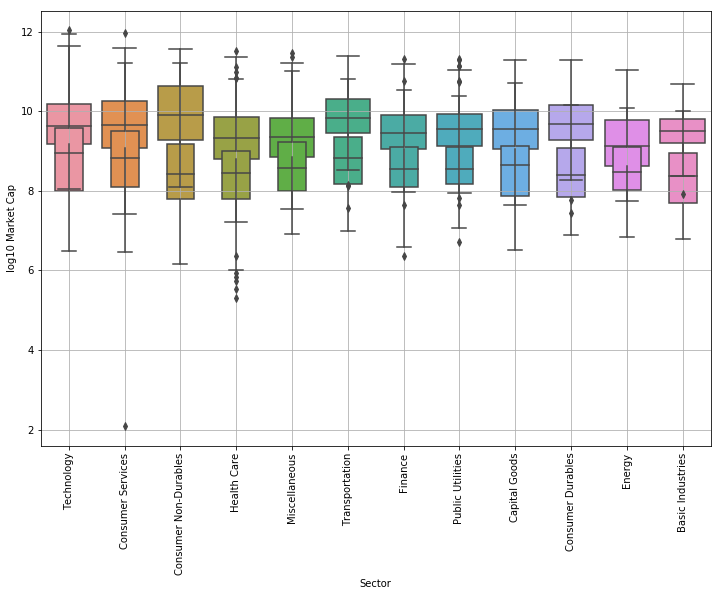

In [45]:
# Market cap by sector
sns.boxplot(x=nyse.Sector, y=np.log10(nyse.MarketCap))
sns.boxplot(x=nasdaq.Sector, y=np.log10(nasdaq.MarketCap), width=0.5)

plt.ylabel('log10 Market Cap')
plt.xticks(rotation=90)
plt.grid()

# IPO Year

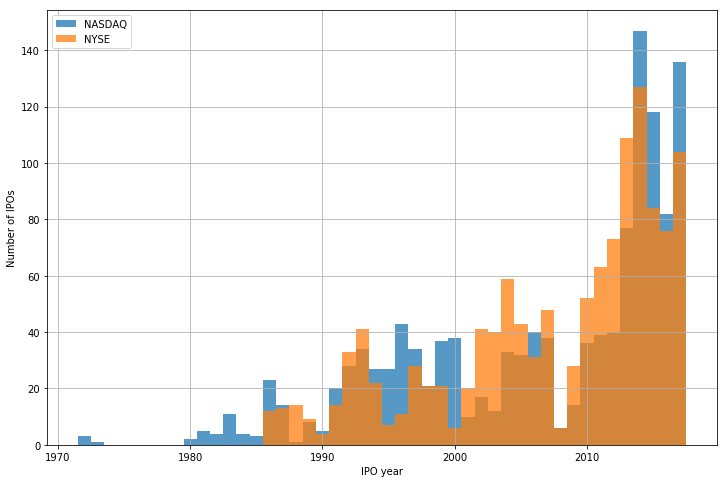

In [41]:
# appearance of stocks on the exchange versus time
bins = np.arange(min(nasdaq.IPOyear) - 0.5, max(nasdaq.IPOyear) + 0.5, 1)
plt.hist(nasdaq[~nasdaq.IPOyear.isna()].IPOyear, alpha=0.75, bins=bins, label='NASDAQ')

bins = np.arange(min(nyse.IPOyear) - 0.5, max(nyse.IPOyear) + 0.5, 1)
plt.hist(nyse[~nyse.IPOyear.isna()].IPOyear, alpha=0.75, bins=bins, label='NYSE')

plt.ylabel('Number of IPOs')
plt.xlabel('IPO year')
plt.legend()
plt.grid()

In [42]:
# why is there a NaN IPO year?
# FIXME this requires followup, it's a LOT of my rows
# and I worry it includes some duplicates (e.g. GOOG vs GOOGL)
nyse[nyse.IPOyear.isna()].head()

,Symbol,Name,MarketCap,IPOyear,Sector,Industry
1223,JPM,J P Morgan Chase & Co,3.857305e+11,NaN,Finance,Major Banks
1252,JNJ,Johnson & Johnson,3.606687e+11,NaN,Health Care,Major Pharmaceuticals
881,XOM,Exxon Mobil Corporation,3.313528e+11,NaN,Energy,Integrated oil Companies
2319,V,Visa Inc.,3.248320e+11,NaN,Miscellaneous,Business Services
245,BAC,Bank of America Corporation,3.077910e+11,NaN,Finance,Major Banks


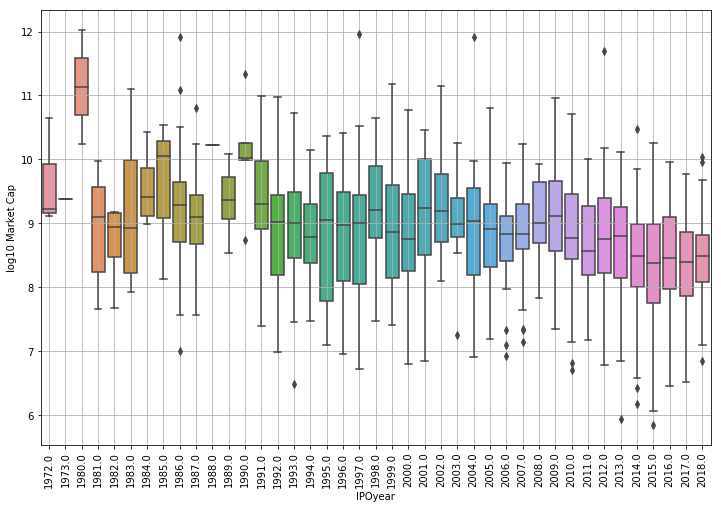

In [43]:
# NASDAQ
# relationship between Market Cap and IPO year
# companies tend to grow ... should expect older companies to have
# greater market cap typically?
sns.boxplot(x=nasdaq[~nasdaq.IPOyear.isna()].IPOyear, y=np.log10(nasdaq[~nasdaq.IPOyear.isna()].MarketCap))
plt.ylabel('log10 Market Cap')
plt.xticks(rotation=90)
plt.grid()

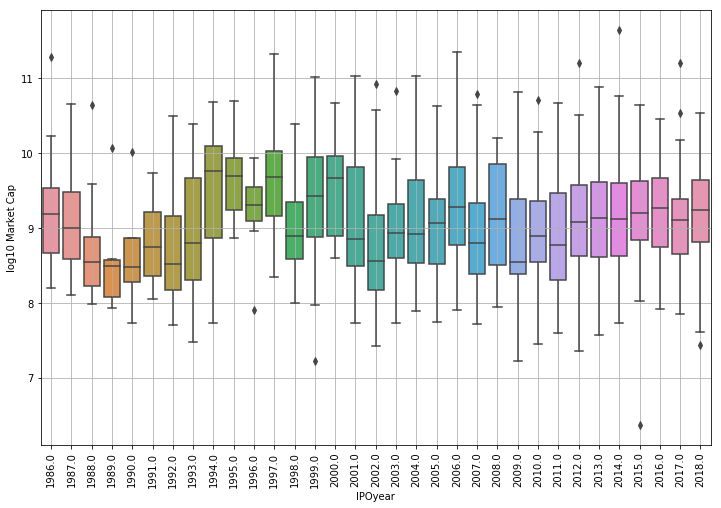

In [44]:
# NYSE
# relationship between Market Cap and IPO year
# companies tend to grow ... should expect older companies to have
# greater market cap typically?
sns.boxplot(x=nyse[~nyse.IPOyear.isna()].IPOyear, y=np.log10(nyse[~nyse.IPOyear.isna()].MarketCap))
plt.ylabel('log10 Market Cap')
plt.xticks(rotation=90)
plt.grid()